In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv("D:\\Skills\\SUMMER PROJECTS\\TML\\IPL2016.csv")
df.head()

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0


In [22]:
df.drop(columns=['Unnamed: 0'], inplace = True)

X = np.array(df.loc[:, 'overall_sr'])
y = np.array(df.loc[:, 'won'])

X = X/200 # scaling appropriately to avoid overflow
X, y


(array([0.84408602, 0.82716049, 0.60784314, 0.74770642, 0.75949367,
        0.62244898, 0.56      , 0.89344262, 0.75      , 0.45588235,
        1.11214953, 0.81707317, 1.08653846, 0.56603774, 0.80612245,
        0.7195122 ]),
 array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64))

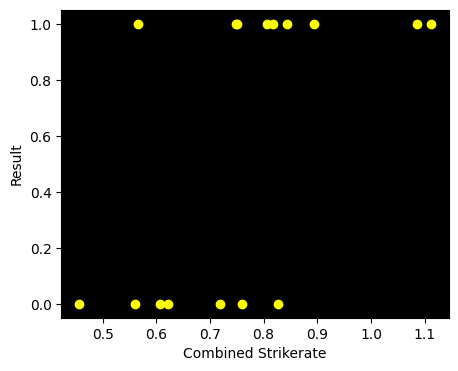

In [23]:
figure = plt.figure(figsize=(5, 4))
ax = figure.add_subplot(111, facecolor='black')

scatter = ax.scatter(X, y, c='yellow')
ax.set_xlabel('Combined Strikerate')
ax.set_ylabel('Result')

plt.show()

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def dW(X, y, y_pred):
    m = y.shape[0]
    derivative_W = -np.sum(X * (y-y_pred))/m
    return derivative_W


def db(y, y_pred):
    m = y.shape[0]
    derivative_b = -np.sum(y-y_pred)/m
    return derivative_b


def CostFunction(y, y_pred):
    m = y.shape[0]
    cost = -np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))/m
    return cost

def GradientDescent(X, y, W, b, epochs, learningRate):
    costHistory = []
    for i in range(epochs):
        W_curr, b_curr = W, b
        y_pred = sigmoid(W_curr*X + b_curr)
        W = W - learningRate * dW(X, y, y_pred)
        b = b - learningRate * db(y, y_pred)
        if i%100 == 0:
            costHistory.append(CostFunction(y, y_pred))
    return W, b ,costHistory

In [25]:
ALPHA = 0.1
epochs = 15000

W = np.random.randn()
b = 0
costHistory = []


W, b, costHistory = GradientDescent(X, y, W, b, epochs, ALPHA)

In [26]:
W, b

(9.667179215419589, -6.922613341768563)

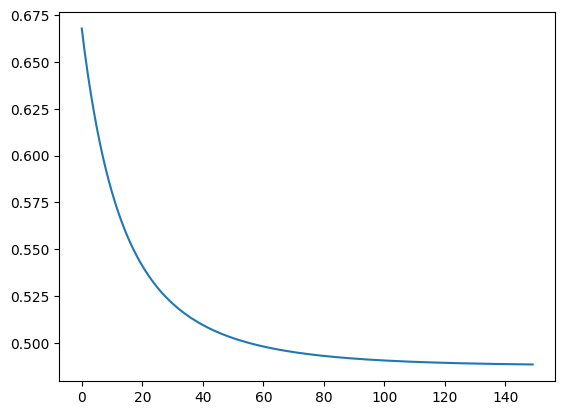

In [27]:
x_temp = np.arange(0, len(costHistory))
plt.plot(x_temp, costHistory)

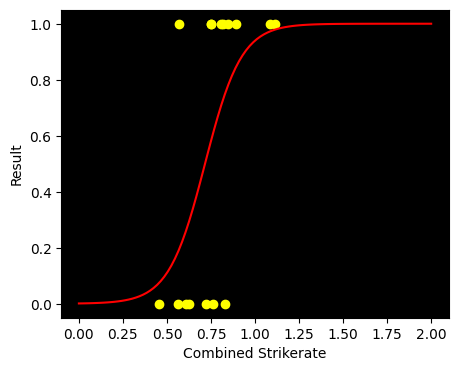

In [28]:
figure = plt.figure(figsize=(5, 4))
ax = figure.add_subplot(111, facecolor='black')

scatter = ax.scatter(X, y, c='yellow')

ax.set_xlabel('Combined Strikerate')
ax.set_ylabel('Result')

X_axis = np.linspace(0, 2, 100)
plot_sigmoid = ax.plot(X_axis, sigmoid(X_axis*W+b), c='red')

plt.show()

In [29]:
m = y.shape[0]
correctPredictions = 0
for i, strikeRate in enumerate(X):
    if W * strikeRate + b >= 0.5:
        prediction = 1
    else:
        prediction = 0
    correctPredictions += y[i]==prediction

print(f" Accuracy = {(correctPredictions / m) * 100} %")

 Accuracy = 75.0 %


In [34]:
def WinProbabilty(StrikeRate):
    StrikeRate = StrikeRate / 200 # scaled by the same factor used for train dataset
    global W, b
    return sigmoid(W*StrikeRate+b)

WinProbabilty(150)

0.5812169451621515